Cargando datos de migracion...
Datos de 'OECD.ELS.IMD,DSD_MIG@DF_MIG,1.0+TUR+ISR..A.B11._T....csv' cargados con exito!

--- Perfilando datos ---

Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STRUCTURE                 1570 non-null   object 
 1   STRUCTURE_ID              1570 non-null   object 
 2   STRUCTURE_NAME            1570 non-null   object 
 3   ACTION                    1570 non-null   object 
 4   REF_AREA                  1570 non-null   object 
 5   Reference area            1570 non-null   object 
 6   CITIZENSHIP               1570 non-null   object 
 7   Citizenship               1570 non-null   object 
 8   FREQ                      1570 non-null   object 
 9   Frequency of observation  1570 non-null   object 
 10  MEASURE                   1570 non-null   object 
 11  Measure  

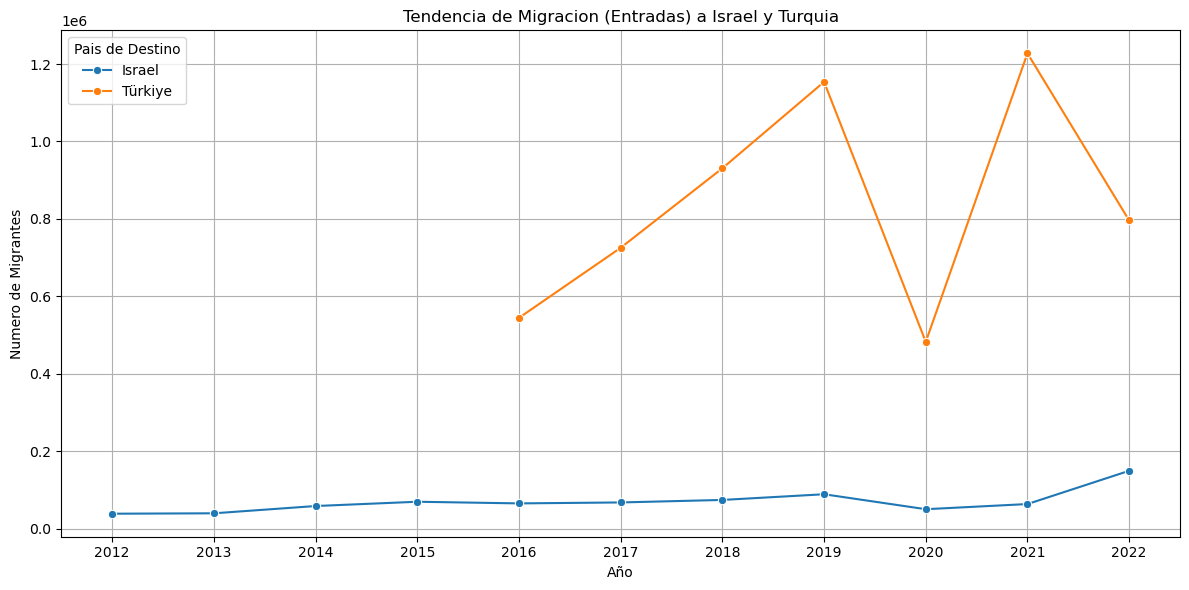

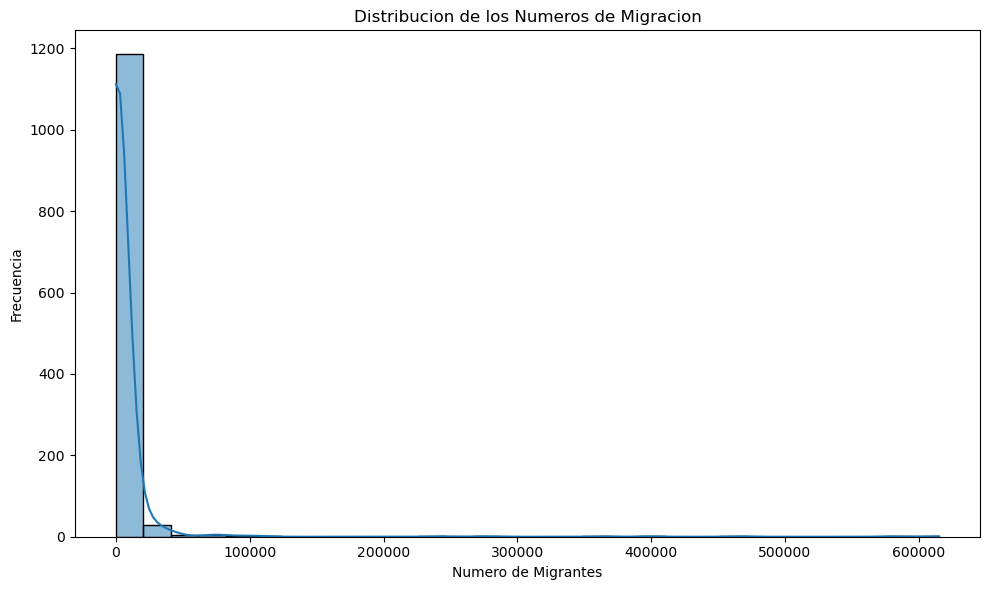

C:\Users\ROG\AppData\Local\Temp\ipykernel_17808\3172759436.py:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Valor_Migracion', y='Pais_Origen', data=top_10_israel_origin, palette='viridis')


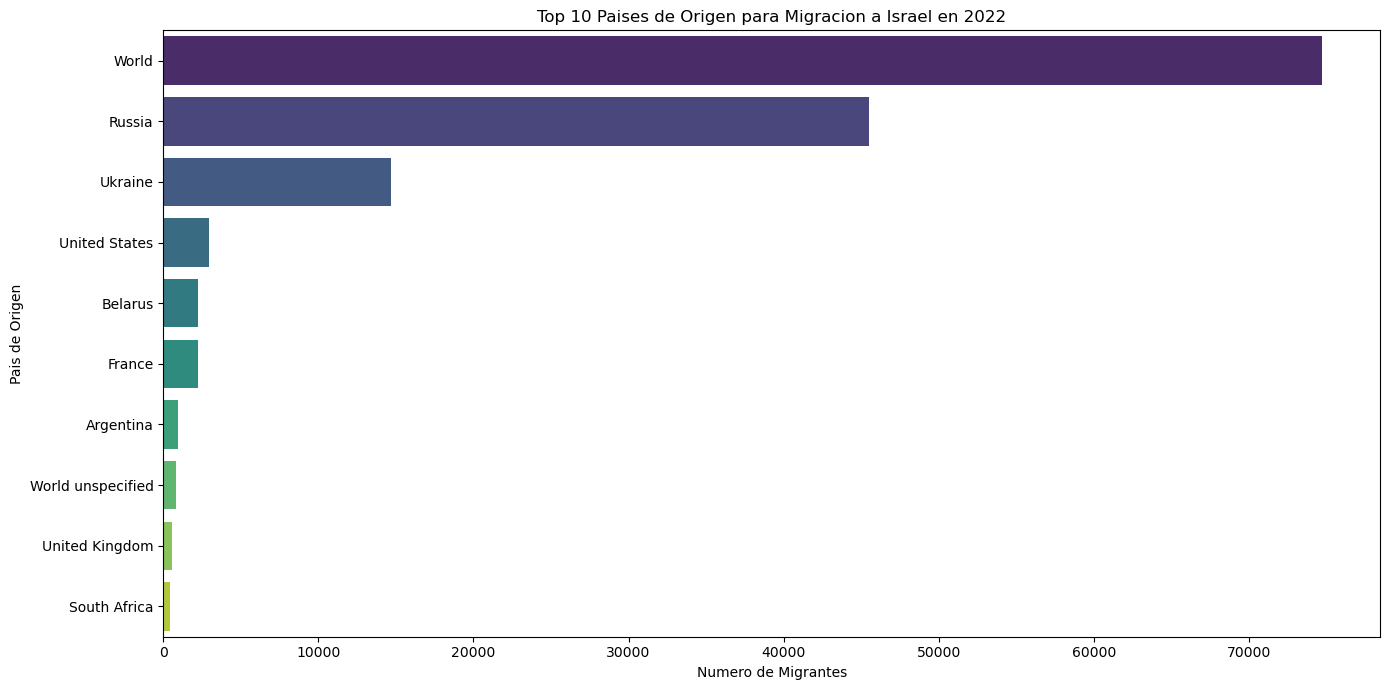

C:\Users\ROG\AppData\Local\Temp\ipykernel_17808\3172759436.py:253: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Valor_Migracion', y='Pais_Origen', data=top_10_turkey_origin, palette='magma')


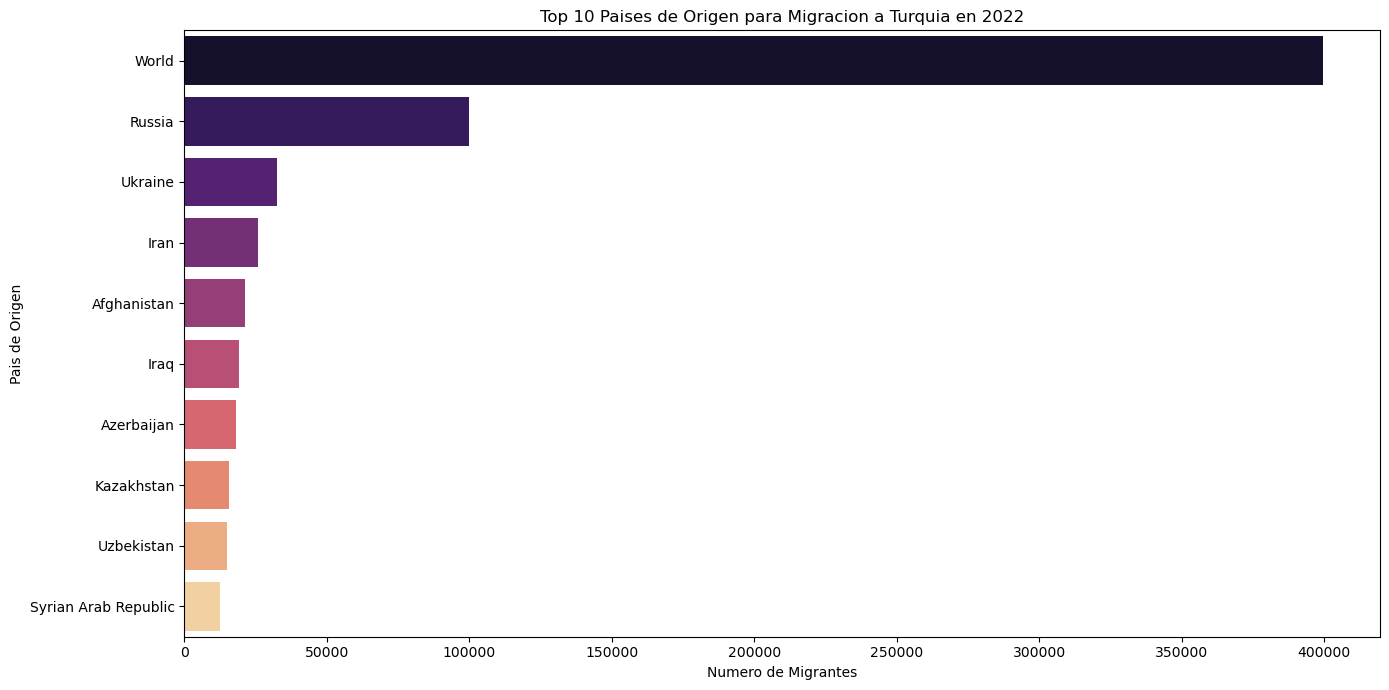

Si jala lol


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Extraccion y perfilado de datos


In [ ]:

# Extraer datos
print("Cargando datos de migracion...")
file_path = 'OECD.ELS.IMD,DSD_MIG@DF_MIG,1.0+TUR+ISR..A.B11._T....csv'
try:
    df = pd.read_csv(file_path)
    print(f"Datos de '{file_path}' cargados con exito!")
except FileNotFoundError:
    print(f"No encuentro el archivo '{file_path}'.")
    print("Por favor, verifica la ruta o que este en la misma carpeta.")
    print("Creando ejemplo de datos para continuar...")
    data_example = {
        'STRUCTURE': ['DATAFLOW'] * 20,
        'STRUCTURE_ID': ['OECD.ELS.IMD:DSD_MIG@DF_MIG(1.0)'] * 20,
        'STRUCTURE_NAME': ['International migration database'] * 20,
        'ACTION': ['I'] * 20,
        'REF_AREA': ['ISR', 'ISR', 'ISR', 'ISR', 'ISR', 'ISR', 'ISR', 'ISR', 'ISR', 'ISR', 'TUR', 'TUR', 'TUR', 'TUR', 'TUR', 'ISR', 'ISR', 'ISR', 'ISR', 'ISR'],
        'Reference area': ['Israel'] * 10 + ['Türkiye'] * 5 + ['Israel'] * 5,
        'CITIZENSHIP': ['IRN'] * 10 + ['HUN'] * 5 + ['AFG'] + ['CHL'] * 4,
        'Citizenship': ['Iran'] * 10 + ['Hungary'] * 5 + ['Afghanistan'] + ['Chile'] * 4,
        'FREQ': ['A'] * 20,
        'Frequency of observation': ['Annual'] * 20,
        'MEASURE': ['B11'] * 20,
        'Measure': ['Inflows of foreign population'] * 20,
        'SEX': ['_T'] * 20,
        'Sex': ['Total'] * 20,
        'BIRTH_PLACE': ['_Z'] * 20,
        'Place of birth': ['Not applicable'] * 20,
        'EDUCATION_LEV': ['_Z'] * 20,
        'Education level': ['Not applicable'] * 20,
        'UNIT_MEASURE': ['PS'] * 20,
        'Unit of measure': ['Persons'] * 20,
        'TIME_PERIOD': [2017, 2018, 2019, 2020, 2021, 2022, 2012, 2013, 2014, 2015, 2021, 2022, 2016, 2017, 2018, 2013, 2013, 2014, 2015, 2016],
        'OBS_VALUE': [18, 76, 67, 32, 78, 45, 37, 82, 27, 35, 190, 113, 146, 0, 119, np.nan, 52, 43, 53, 54],
        'OBS_STATUS': ['A'] * 20,
        'Observation status': ['Normal value'] * 20,
        'UNIT_MULT': [0] * 20,
        'Unit multiplier': ['Units'] * 20,
        'DECIMALS': [0] * 20,
        'Decimals': ['Zero'] * 20
    }
    df = pd.DataFrame(data_example)



# Perfilado de datos


In [ ]:

print("\n--- Perfilando datos ---")
print("\nInfo del dataset:")
df.info()

print("\nPrimeras filas:")
print(df.head())

print("\nEstadisticas de columnas numericas:")
df['OBS_VALUE'] = pd.to_numeric(df['OBS_VALUE'], errors='coerce')
print(df.describe())

print("\nDatos faltantes (nulos por columna):")
print(df.isnull().sum())
print("\nPorcentaje de datos faltantes:")
print((df.isnull().sum() / len(df)) * 100)

print("\nValores unicos por columna:")
for col in df.columns:
    print(f"- {col}: {df[col].nunique()} valores unicos")
    if df[col].nunique() < 50:
        print(f"    Valores: {df[col].unique()}")

print("\nFilas duplicadas:")
num_duplicates = df.duplicated().sum()
print(f"Encontradas {num_duplicates} filas duplicadas.")



# Deteccion de patrones



--- Deteccion de patrones ---
Aqui el patron principal es como el numero de migrantes ('OBS_VALUE') cambia con el 'Año' y entre los diferentes 'Paises de Destino' y 'Paises de Origen'.
No hay columnas con correos, direcciones o nombres que requieran patrones especificos.

--- Limpieza de datos ---

Dataset despues de seleccionar y renombrar columnas:
  Pais_Destino Pais_Origen   Año  Valor_Migracion
0       Israel        Iran  2017             18.0
1       Israel        Iran  2018             76.0
2       Israel        Iran  2019             67.0
3       Israel        Iran  2020             32.0
4       Israel        Iran  2021             78.0

Completando datos: Nulos antes de limpieza:
Pais_Destino         0
Pais_Origen          0
Año                  0
Valor_Migracion    334
dtype: int64
Nulos despues de quitar filas sin valor de migracion:
Pais_Destino       0
Pais_Origen        0
Año                0
Valor_Migracion    0
dtype: int64

Detectando y manejando outliers:
Detectados 

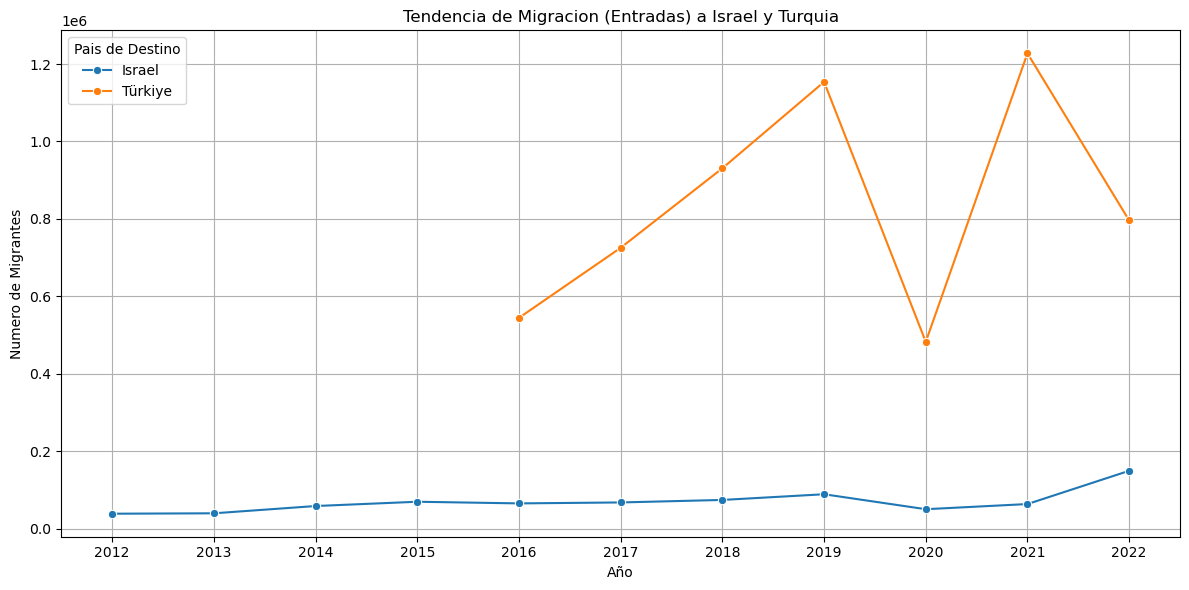

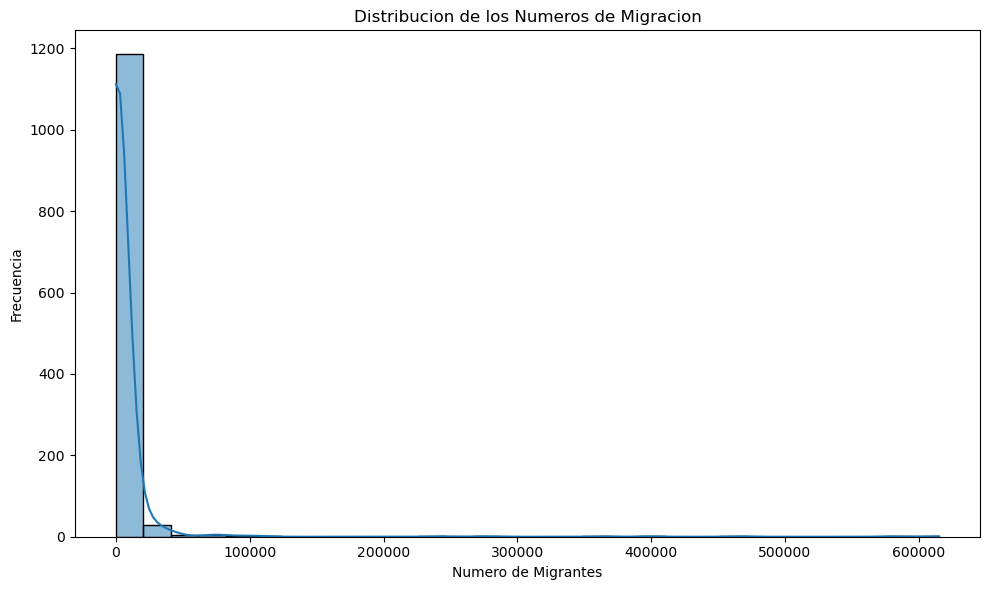

C:\Users\ROG\AppData\Local\Temp\ipykernel_17808\2636579563.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Valor_Migracion', y='Pais_Origen', data=top_10_israel_origin, palette='viridis')


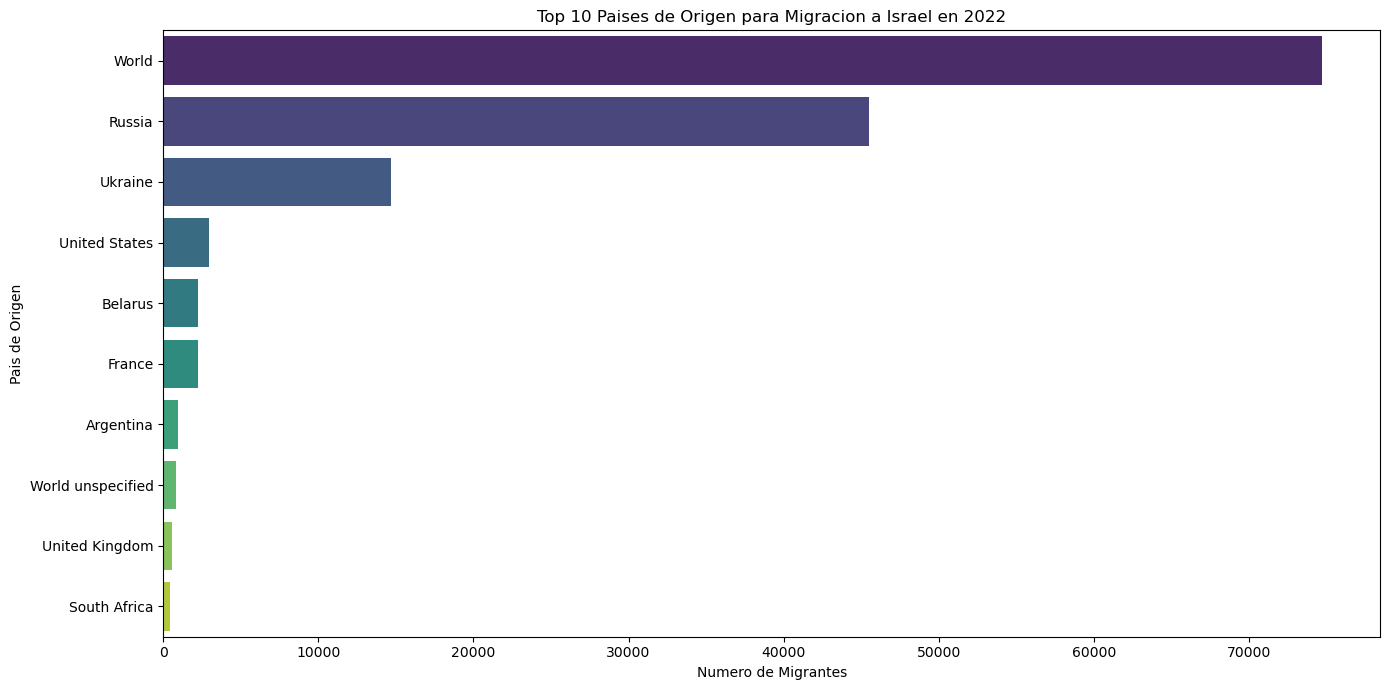

C:\Users\ROG\AppData\Local\Temp\ipykernel_17808\2636579563.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Valor_Migracion', y='Pais_Origen', data=top_10_turkey_origin, palette='magma')


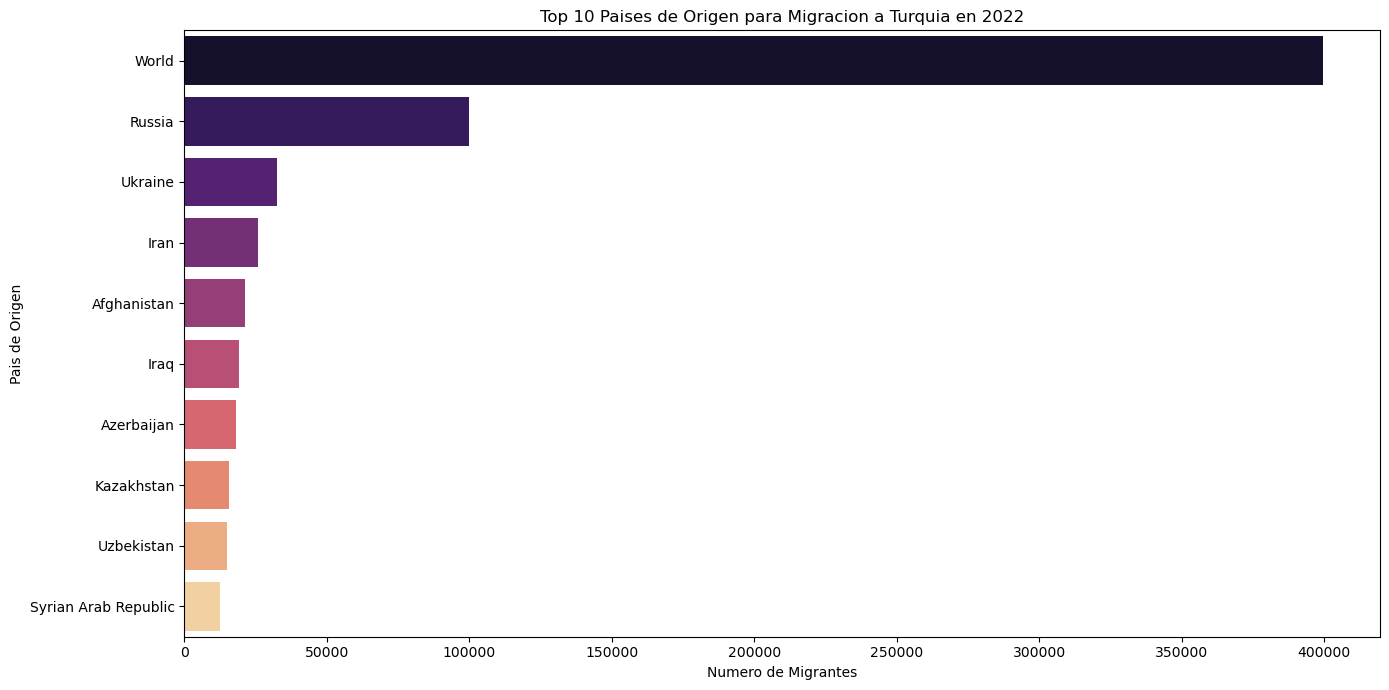

Si jala lol


In [7]:

print("\n--- Deteccion de patrones ---")
print("Aqui el patron principal es como el numero de migrantes ('OBS_VALUE') cambia con el 'Año' y entre los diferentes 'Paises de Destino' y 'Paises de Origen'.")
print("No hay columnas con correos, direcciones o nombres que requieran patrones especificos.")

# Limpieza de datos
print("\n--- Limpieza de datos ---")

# Seleccion y renombrado de columnas
df_cleaned = df[['Reference area', 'Citizenship', 'TIME_PERIOD', 'OBS_VALUE']].copy()
df_cleaned.rename(columns={
    'Reference area': 'Pais_Destino',
    'Citizenship': 'Pais_Origen',
    'TIME_PERIOD': 'Año',
    'OBS_VALUE': 'Valor_Migracion'
}, inplace=True)

print("\nDataset despues de seleccionar y renombrar columnas:")
print(df_cleaned.head())

# Completar datos
print("\nCompletando datos: Nulos antes de limpieza:")
print(df_cleaned.isnull().sum())
df_cleaned.dropna(subset=['Valor_Migracion'], inplace=True)
print("Nulos despues de quitar filas sin valor de migracion:")
print(df_cleaned.isnull().sum())

# Deteccion y manejo de outliers
print("\nDetectando y manejando outliers:")
Q1 = df_cleaned['Valor_Migracion'].quantile(0.25)
Q3 = df_cleaned['Valor_Migracion'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_cleaned[(df_cleaned['Valor_Migracion'] < lower_bound) | (df_cleaned['Valor_Migracion'] > upper_bound)]
print(f"Detectados {len(outliers)} posibles outliers en 'Valor_Migracion'.")

if len(outliers) > 0:
    print("Ejemplos de outliers:")
    print(outliers.head())
    print("No se eliminaran estos outliers, ya que valores altos en migracion pueden ser legitimos.")
else:
    print("No se detectaron outliers significativos.")

# Forzar patrones y tipos
print("\nForzando patrones y tipos de datos:")
df_cleaned['Año'] = pd.to_numeric(df_cleaned['Año'], errors='coerce').astype(int)
df_cleaned['Valor_Migracion'] = pd.to_numeric(df_cleaned['Valor_Migracion'], errors='coerce')
df_cleaned['Pais_Destino'] = df_cleaned['Pais_Destino'].str.strip()
df_cleaned['Pais_Origen'] = df_cleaned['Pais_Origen'].str.strip()

print("Tipos de datos actualizados:")
df_cleaned.info()
print("\nPaises de Destino unicos despues de limpieza:")
print(df_cleaned['Pais_Destino'].unique())
print("\nPaises de Origen unicos despues de limpieza:")
print(df_cleaned['Pais_Origen'].unique())

# Deduplicar datos
print("\nDeduplicando datos:")
print(f"Duplicados antes: {df_cleaned.duplicated().sum()}")
df_cleaned.drop_duplicates(inplace=True)
print(f"Duplicados despues: {df_cleaned.duplicated().sum()}")
print(f"Dataset limpio tiene {len(df_cleaned)} filas.")

# Preprocesamiento de datos
print("\n--- Preprocesamiento de datos ---")

# Transformacion: cambio porcentual
print("Calculando el cambio porcentual de migracion entre años.")
df_cleaned_sorted = df_cleaned.sort_values(by=['Pais_Destino', 'Pais_Origen', 'Año'])
df_cleaned_sorted['Cambio_Porcentual_Migracion'] = df_cleaned_sorted.groupby(['Pais_Destino', 'Pais_Origen'])['Valor_Migracion'].pct_change() * 100

print("\nDataset con cambio porcentual de migracion:")
print(df_cleaned_sorted.head(10))

# Analisis de datos (mineria de datos descriptiva)
print("\n--- Analisis de datos ---")

# Relaciones y patrones de comportamiento
print("Aqui analizaremos como el año, pais de destino y origen, y el numero de migrantes se relacionan para identificar tendencias y patrones en el movimiento de personas.")

# Resolucion de preguntas de negocio

# Pregunta 1: Promedio de migrantes por pais de destino
avg_migration_by_destination = df_cleaned_sorted.groupby('Pais_Destino')['Valor_Migracion'].mean().reset_index()
print("\n1. Promedio de migrantes (entradas) por pais de destino:")
print(avg_migration_by_destination.sort_values(by='Valor_Migracion', ascending=False))

# Pregunta 2: Evolucion de la migracion por pais de destino
print("\n2. Evolucion de la migracion (entradas) por pais de destino a lo largo de los años:")
migration_by_year_destination = df_cleaned_sorted.groupby(['Pais_Destino', 'Año'])['Valor_Migracion'].sum().unstack(fill_value=0)
print(migration_by_year_destination)

# Pregunta 3: Pais con mas/menos migrantes en 2022
year_to_analyze = 2022
migration_2022 = df_cleaned_sorted[df_cleaned_sorted['Año'] == year_to_analyze].groupby('Pais_Destino')['Valor_Migracion'].sum().reset_index()
highest_migration_2022 = migration_2022.loc[migration_2022['Valor_Migracion'].idxmax()]
lowest_migration_2022 = migration_2022.loc[migration_2022['Valor_Migracion'].idxmin()]
print(f"\n3. Para el año {year_to_analyze}:")
print(f"   Pais con mas migrantes: {highest_migration_2022['Pais_Destino']} ({highest_migration_2022['Valor_Migracion']} personas)")
print(f"   Pais con menos migrantes: {lowest_migration_2022['Pais_Destino']} ({lowest_migration_2022['Valor_Migracion']} personas)")

# Pregunta 4: Flujos con mayor cambio porcentual en un año
year_for_change = 2022
df_change_year = df_cleaned_sorted[df_cleaned_sorted['Año'] == year_for_change].dropna(subset=['Cambio_Porcentual_Migracion'])
if not df_change_year.empty:
    max_increase = df_change_year.loc[df_change_year['Cambio_Porcentual_Migracion'].idxmax()]
    max_decrease = df_change_year.loc[df_change_year['Cambio_Porcentual_Migracion'].idxmin()]
    print(f"\n4. Flujos migratorios que mas cambiaron en {year_for_change}:")
    print(f"   Mayor subida: De {max_increase['Pais_Origen']} a {max_increase['Pais_Destino']} (+{max_increase['Cambio_Porcentual_Migracion']:.2f}%)")
    print(f"   Mayor bajada: De {max_decrease['Pais_Origen']} a {max_decrease['Pais_Destino']} ({max_decrease['Cambio_Porcentual_Migracion']:.2f}%)")
else:
    print(f"\n4. No hay datos de cambios porcentuales para el año {year_for_change}.")

# Pregunta 5: Top 5 paises de origen para Israel y Turquia en el ultimo año
latest_year = df_cleaned_sorted['Año'].max()
print(f"\n5. Top 5 paises de origen para Israel y Turquia en {latest_year}:")

for pais_destino in ['Israel', 'Türkiye']:
    top_origins = df_cleaned_sorted[
        (df_cleaned_sorted['Pais_Destino'] == pais_destino) &
        (df_cleaned_sorted['Año'] == latest_year)
    ].groupby('Pais_Origen')['Valor_Migracion'].sum().nlargest(5).reset_index()
    print(f"  Para {pais_destino}:")
    print(top_origins)

# Graficas
print("\n--- Graficas ---")

# Grafico 1: Tendencia de migracion a Israel y Turquia
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned_sorted[df_cleaned_sorted['Pais_Destino'].isin(['Israel', 'Türkiye'])],
             x='Año', y='Valor_Migracion', hue='Pais_Destino', marker='o', estimator='sum', errorbar=None)
plt.title('Tendencia de Migracion (Entradas) a Israel y Turquia')
plt.xlabel('Año')
plt.ylabel('Numero de Migrantes')
plt.grid(True)
plt.xticks(df_cleaned_sorted['Año'].unique().astype(int))
plt.legend(title='Pais de Destino')
plt.tight_layout()
plt.show()

# Grafico 2: Distribucion del numero de migrantes
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_sorted['Valor_Migracion'], bins=30, kde=True)
plt.title('Distribucion de los Numeros de Migracion')
plt.xlabel('Numero de Migrantes')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Grafico 3: Top 10 paises de origen para Israel
plt.figure(figsize=(14, 7))
latest_year_israel = df_cleaned_sorted['Año'].max()
top_10_israel_origin = df_cleaned_sorted[
    (df_cleaned_sorted['Pais_Destino'] == 'Israel') &
    (df_cleaned_sorted['Año'] == latest_year_israel)
].groupby('Pais_Origen')['Valor_Migracion'].sum().nlargest(10).reset_index()

sns.barplot(x='Valor_Migracion', y='Pais_Origen', data=top_10_israel_origin, palette='viridis')
plt.title(f'Top 10 Paises de Origen para Migracion a Israel en {latest_year_israel}')
plt.xlabel('Numero de Migrantes')
plt.ylabel('Pais de Origen')
plt.tight_layout()
plt.show()

# Grafico 4: Top 10 paises de origen para Turquia
plt.figure(figsize=(14, 7))
latest_year_turkey = df_cleaned_sorted['Año'].max()
top_10_turkey_origin = df_cleaned_sorted[
    (df_cleaned_sorted['Pais_Destino'] == 'Türkiye') &
    (df_cleaned_sorted['Año'] == latest_year_turkey)
].groupby('Pais_Origen')['Valor_Migracion'].sum().nlargest(10).reset_index()

sns.barplot(x='Valor_Migracion', y='Pais_Origen', data=top_10_turkey_origin, palette='magma')
plt.title(f'Top 10 Paises de Origen para Migracion a Turquia en {latest_year_turkey}')
plt.xlabel('Numero de Migrantes')
plt.ylabel('Pais de Origen')
plt.tight_layout()
plt.show()

print("Si jala lol")